In [1]:
#import numpy, pandas, seaborn, matplotlib.pyplot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [7]:
df.FamilySize.value_counts().sort_index()

,count
FamilySize,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


In [8]:
df['IsAlone'] = np.where(df['FamilySize'] == 1,1,0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


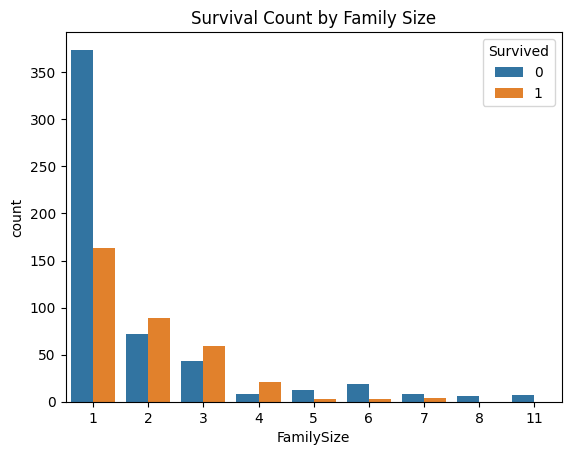

In [9]:
#Countplot of survival by family size with title
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival Count by Family Size')
plt.show()

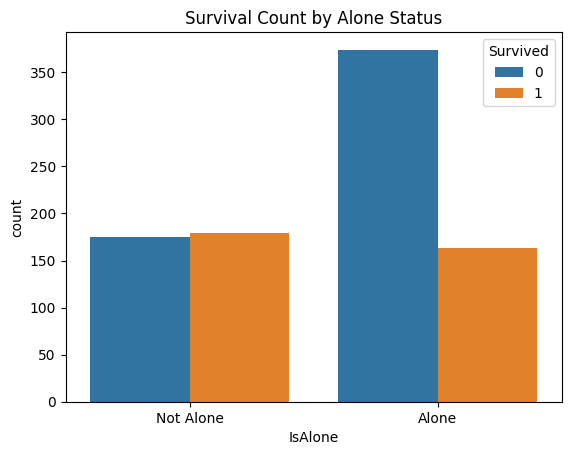

In [10]:
#plot of survival by alone status
sns.countplot(x='IsAlone', hue='Survived', data=df)
plt.title('Survival Count by Alone Status')
plt.xticks([0,1],['Not Alone','Alone'])
plt.show()

In [12]:
#Survival rate by gender
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [13]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [16]:
#Survival rate by embarked
df.groupby('Embarked')['Survived'].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [17]:
#Survival rate by isAlone
df.groupby('IsAlone')['Survived'].mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [19]:
# Analyze survival by age groups (children, adults, seniors)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,50,80], labels=['Children', 'Adults', 'Seniors'])

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Adults


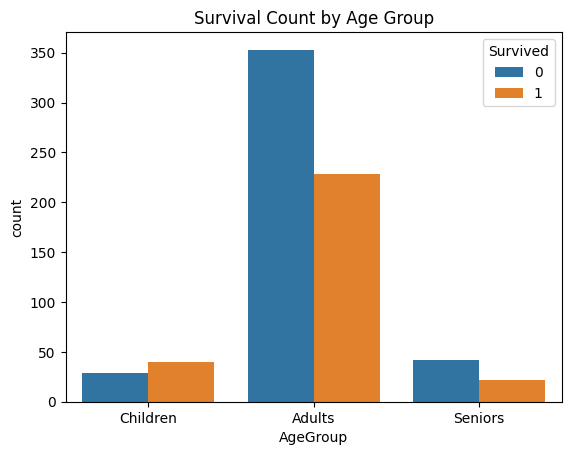

In [21]:
#Visualize Survival by AgeGroup
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title('Survival Count by Age Group')
plt.show()

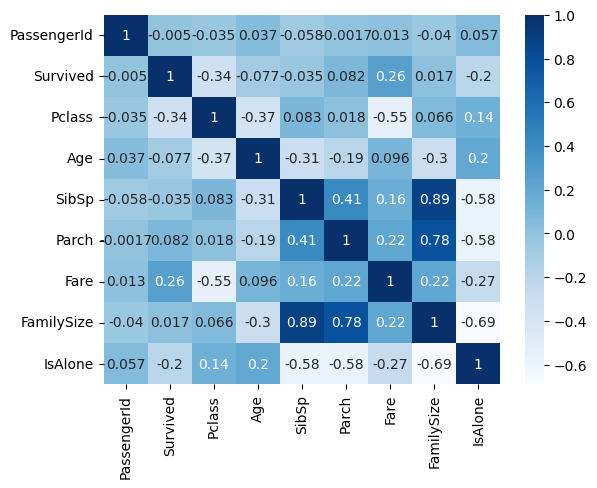

In [24]:
#heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

In [26]:
highest = df[df['Fare'] == df['Fare'].max()]
highest[['Name','Fare','Survived','Age']]

,Name,Fare,Survived,Age
258,"Ward, Miss. Anna",512.3292,1,35.0
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,1,36.0
737,"Lesurer, Mr. Gustave J",512.3292,1,35.0


In [28]:
df[df['Fare'] == df['Fare'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,AgeGroup
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,1,Adults
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,0,Adults
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,1,Adults
